# Flare 2023/06/18

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:\solar flares\data\\2023-06-18\\fits\\nb_3950_2023-06-18.fits"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {maximum}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_26240\892281539.py:4: SyntaxWarning: invalid escape sequence '\s'
  folder_path = "E:\solar flares\data\\2023-06-18\\fits\\nb_3950_2023-06-18.fits"


In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

SIMPLE  =                    T / Written by IDL:  Wed Jul 26 14:40:49 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1864 / Number of positions along axis 1               
NAXIS2  =                 2012 / Number of positions along axis 2               
NAXIS3  =                   29 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                   34 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io[:10]):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0][0][0])
    tlist2 = io[8].data
    pos = io[1].data
    
maximum = 34

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000256B23F2C60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241D130>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241D850>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241DFA0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241E6F0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241EE40>, <astropy.io.fits.hdu.image.ImageHDU object at 0x00000256B241F6E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B24301A0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256A9365DC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241F950>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241F0E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241EA50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241DCD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000256B241CFB0>, <astropy.io.fits.hdu.ta

In [5]:

wvl = pos[0][0][:,:,0,0,2][0]*10
print(wvl)
np.save('line_data/wav_sstCaK.npy', wvl)

[3966.4807202 3966.7307202 3966.9807202 3967.2307202 3967.4807202
 3967.5807202 3967.6807202 3967.7807202 3967.8807202 3967.9807202
 3968.0807202 3968.1807202 3968.2807202 3968.3807202 3968.4807202
 3968.5807202 3968.6807202 3968.7807202 3968.8807202 3968.9807202
 3969.0807202 3969.1807202 3969.2807202 3969.3807202 3969.4807202
 3969.7307202 3969.9807202 3970.2307202 3999.       ]


In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('02.60365',
 array(['2023-06-18T09:37:12.42340', '2023-06-18T09:37:37.39191',
        '2023-06-18T09:38:02.60365', '2023-06-18T09:38:27.51277',
        '2023-06-18T09:38:52.61429', '2023-06-18T09:39:17.74519',
        '2023-06-18T09:39:43.08734', '2023-06-18T09:40:08.13984',
        '2023-06-18T09:40:33.16106', '2023-06-18T09:40:57.99195',
        '2023-06-18T09:41:23.15210', '2023-06-18T09:41:47.97942',
        '2023-06-18T09:42:13.12941', '2023-06-18T09:42:37.94272',
        '2023-06-18T09:43:02.86304', '2023-06-18T09:43:27.86947',
        '2023-06-18T09:43:52.92641', '2023-06-18T09:44:18.05588',
        '2023-06-18T09:44:42.98391', '2023-06-18T09:45:08.25631',
        '2023-06-18T09:45:33.31380', '2023-06-18T09:45:58.35963',
        '2023-06-18T09:46:23.37010', '2023-06-18T09:46:48.23209',
        '2023-06-18T09:47:13.23743', '2023-06-18T09:47:37.90289',
        '2023-06-18T09:48:02.86899', '2023-06-18T09:48:27.78770',
        '2023-06-18T09:48:52.65190', '2023-06-18T09:49:17.61927

In [7]:
time_list = [t[11:] for t in tlist3]
time_list

['09:37:12.42340',
 '09:37:37.39191',
 '09:38:02.60365',
 '09:38:27.51277',
 '09:38:52.61429',
 '09:39:17.74519',
 '09:39:43.08734',
 '09:40:08.13984',
 '09:40:33.16106',
 '09:40:57.99195',
 '09:41:23.15210',
 '09:41:47.97942',
 '09:42:13.12941',
 '09:42:37.94272',
 '09:43:02.86304',
 '09:43:27.86947',
 '09:43:52.92641',
 '09:44:18.05588',
 '09:44:42.98391',
 '09:45:08.25631',
 '09:45:33.31380',
 '09:45:58.35963',
 '09:46:23.37010',
 '09:46:48.23209',
 '09:47:13.23743',
 '09:47:37.90289',
 '09:48:02.86899',
 '09:48:27.78770',
 '09:48:52.65190',
 '09:49:17.61927',
 '09:49:42.49388',
 '09:50:07.42078',
 '09:50:32.53168',
 '09:50:57.55897']

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] 
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (29, 2012, 1864)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:\solar flares\data\2023-06-18\fits\nb_3950_2023-06-18.fits
s=(29, 2012, 1864)
the shape of the data is (34, '??', 29, 2012, 1864)
the wavelengths are self._wavel = array([3966.4807202, 3966.7307202, 3966.9807202, 3967.2307202,
       3967.4807202, 3967.5807202, 3967.6807202, 3967.7807202,
       3967.8807202, 3967.9807202, 3968.0807202, 3968.1807202,
       3968.2807202, 3968.3807202, 3968.4807202, 3968.5807202,
       3968.6807202, 3968.7807202, 3968.8807202, 3968.9807202,
       3969.0807202, 3969.1807202, 3969.2807202, 3969.3807202,
       3969.4807202, 3969.7307202, 3969.9807202, 3970.2307202,
       3999.       ])
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0


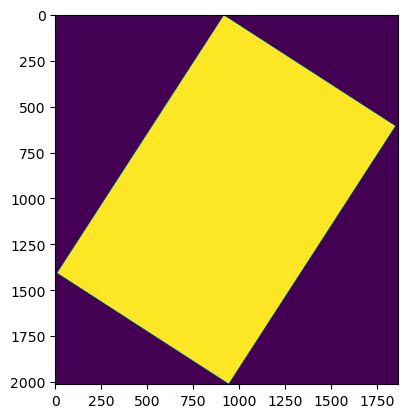

calculated boundary at frame 4


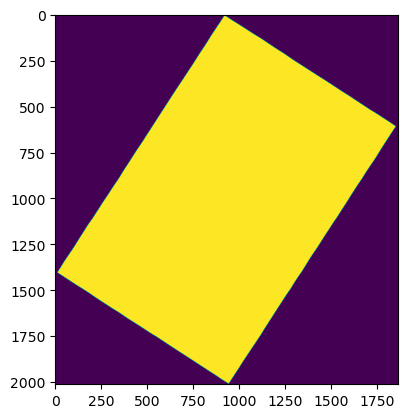

calculated boundary at frame 8


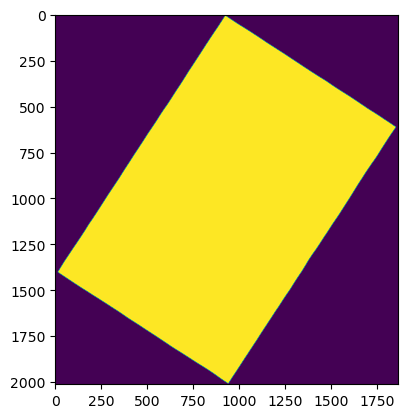

calculated boundary at frame 12


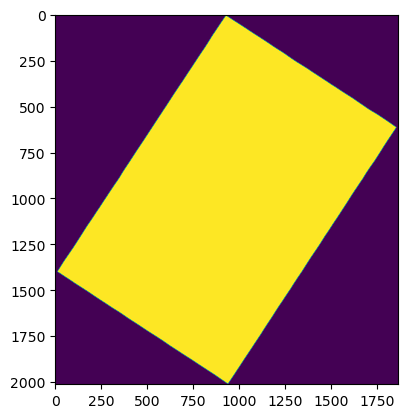

calculated boundary at frame 16


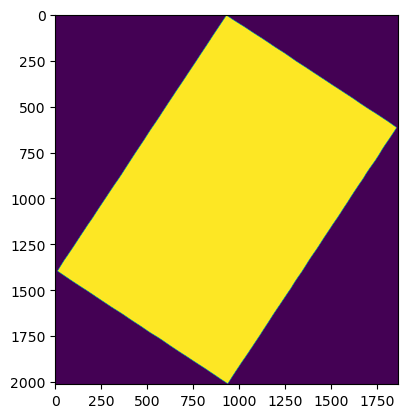

calculated boundary at frame 20


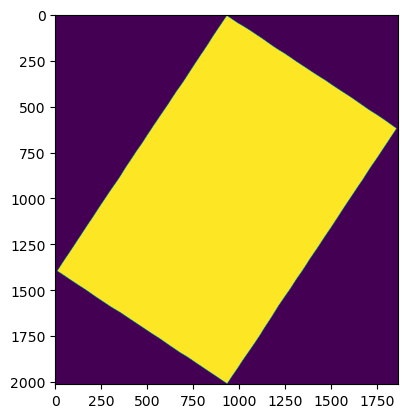

calculated boundary at frame 24


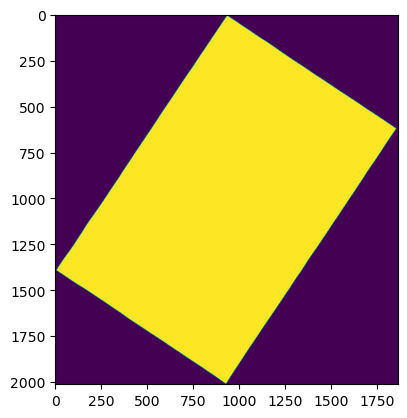

calculated boundary at frame 28


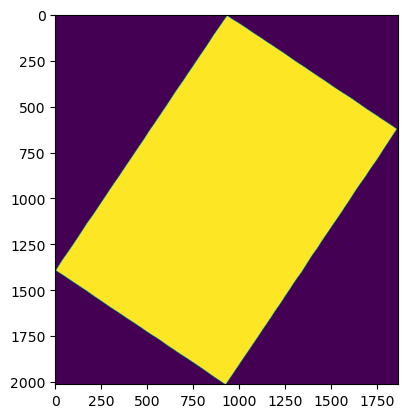

calculated boundary at frame 32


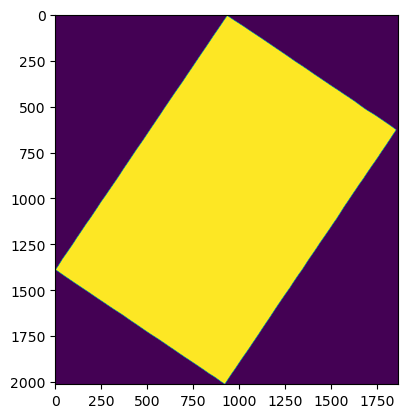

calculated boundary over folowing frames range(0, 34, 4)
Boundary
Blue=Outside, yellow=Inside


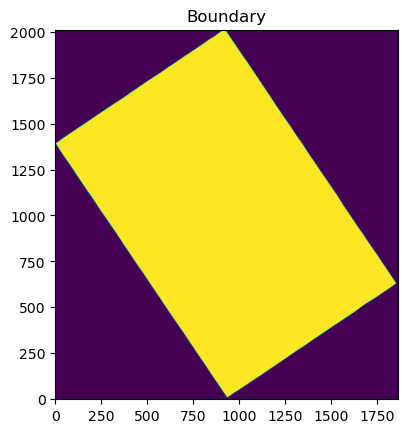

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)

# vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

CaK = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename='line_data/wav_sstCaK.npy', 
    number_of_frames=maximum,
    time=time_list, 
    name_of_line='CaK(2)23a', 
    thresh=[0, np.percentile(datacube(0), 99.5)],  
    boundary_methode='search_overlap', 
    boundary_arguments = {"error":0.01}, 
    with_stokes=True, 
    with_time=True, 
    alternative_datacube=datacube)

# CaK.datacube
# np.shape(CaK.datacube), CaK.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaK.boundary


In [11]:
# CaK.calculate__FOV_spect_over_time()

In [12]:
secs = un.get_TIME(CaK)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaK.shape=}')

the mean cadence is 25.0 seconds for this line!
CaK.shape=(34, '??', 29, 2012, 1864)


The guessed filters are [[4.333333333333333, 3.625], [14.0, 3.625], [23.666666666666668, 3.625]]


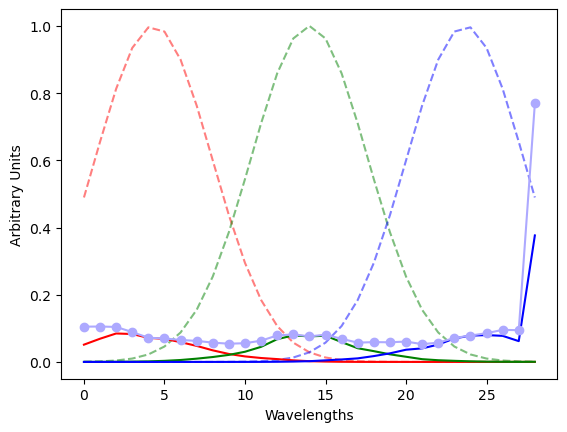

In [13]:
# %matplotlib inline
CaK.update_filters(None)# [[3,2], [7,2], [11,2]]
CaK.plot_filt(880,900)
plt.show()

COCOPLOT at  t=09:37:12 UT (frame number 0 )


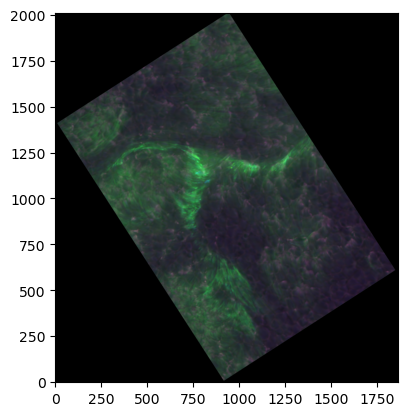

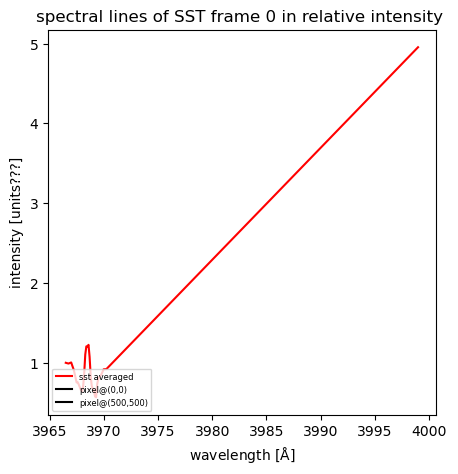

In [14]:
CaK.ccp_frame(0)
CaK.current_ccp[0:30:10,0:60:20,:]
CaK.plot_integrate_spectr(0, pixels=[[0,0],[500,500]])

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_26240\2544615474.py:3: SyntaxWarning: invalid escape sequence '\s'
  theor_CaK = un.linestudier('E:\solar flares\data\\2017-09-06\\fits\\3968_clv.fits', atlas=None, nr=101, neglect_atlas=True)


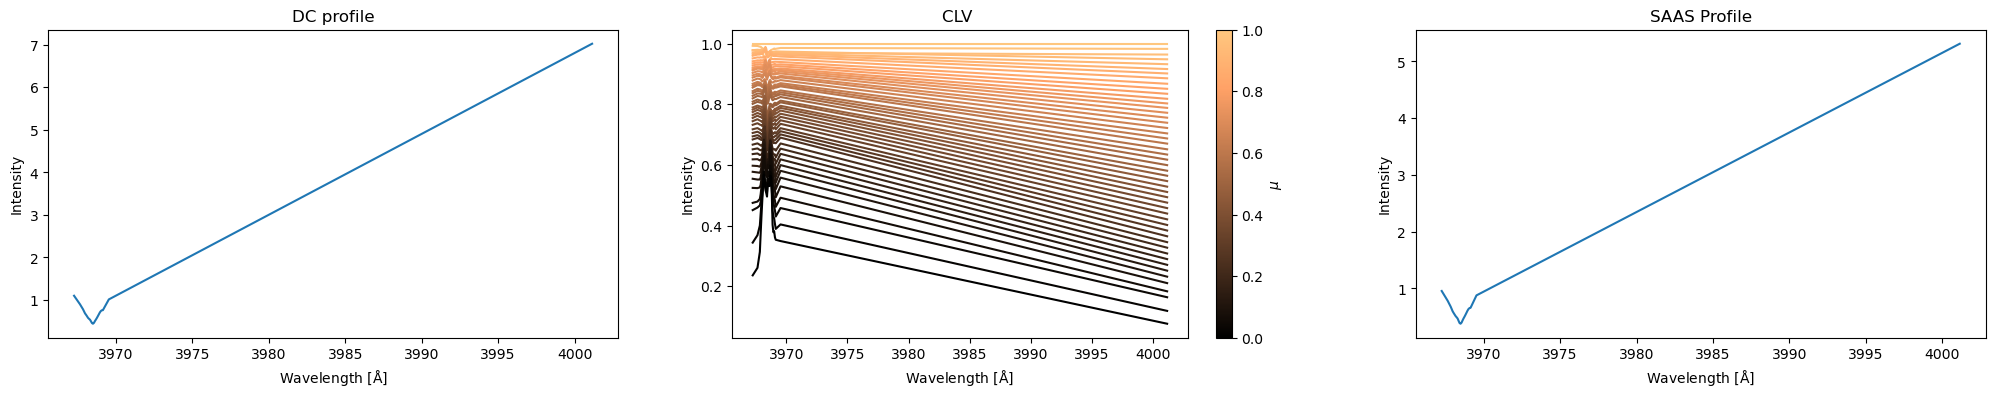

3968.4911461481825 3969.7557499021514


In [15]:
reload(un)
# "E:\solar flares\data\2017-09-06\line_data\final_3950.npy"
theor_CaK = un.linestudier('E:\solar flares\data\\2017-09-06\\fits\\3968_clv.fits', atlas=None, nr=101, neglect_atlas=True)
print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

## Calculating the $\mu$ !!!!! 


In [16]:
CaK.shape

(34, '??', 29, 2012, 1864)

In [17]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaK.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

# x= -598.761391414
# y = -353.460135090 
# pix_x=  1392.00 
# pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Wed Jul 26 14:40:49 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1864 / Number of positions along axis 1              
 NAXIS2  =                 2012 / Number of positions along axis 2              
 NAXIS3  =                   29 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                   34 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 PC1_1   =              1.00000 / No rotations                                  
 PC2_2   =              1.00000 / No rotations                                  
 PC3_3   =              1.00000 / No rotations                                  
 PC4_4   =              1.000

In [18]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [19]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
np.shape(xy), xy[maximum//2,0], fxp, fyp

((34, 29, 2, 2, 2),
 array([[[-442.67394341, -427.95390286],
         [-372.06624341, -427.95390286]],
 
        [[-442.67394341, -351.73700286],
         [-372.06624341, -351.73700286]]], dtype='>f8'),
 array([-442.67394341, -372.06624341, -427.95390286, -351.73700286]),
 array([-427.95390286, -351.73700286], dtype='>f8'))

does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8088041487634432 for timeframe 10
AVERAGE POSITION: The average $\mu$ wheigthed over the field of view is (-407.48716449029115, -389.70416250055564) for timeframe 10
Coundourplot succesfully saved.


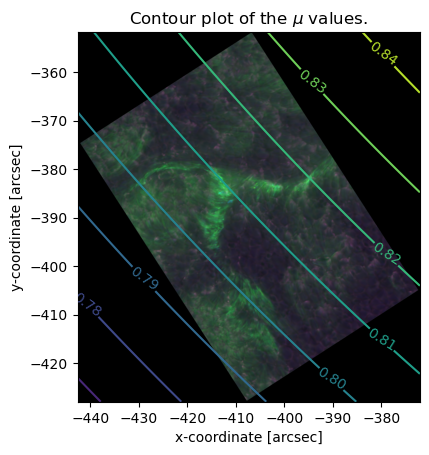

In [20]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

x = np.linspace(fxp[0], fxp[1], CaK.shape[4])
y = np.linspace(fyp[0], fyp[1], CaK.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        av_x = np.nanmean(X*B)
        av_y = np.nanmean(Y*B)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
        print(r'AVERAGE POSITION: The average $\mu$ wheigthed over the field of view is', (av_x, av_y), 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaK, save=True, save_name=CaK.name_of_line, timeFrame=10)
sst_data = CaK
theor_line = theor_CaK
set_mu(CaK, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaK.index_mu], theor_line.sst_clv[theor_CaK.index_mu][0], clv_fit(mu, theor_line)


(202, 187) (202, 187) (201, 186)


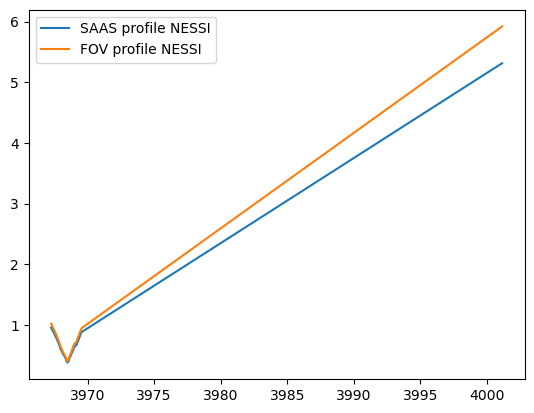

In [21]:
theor_CaK.set_fov( xx, yy, CaK.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

<>:42: SyntaxWarning: invalid escape sequence '\C'
<>:42: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_26240\3837192070.py:42: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')


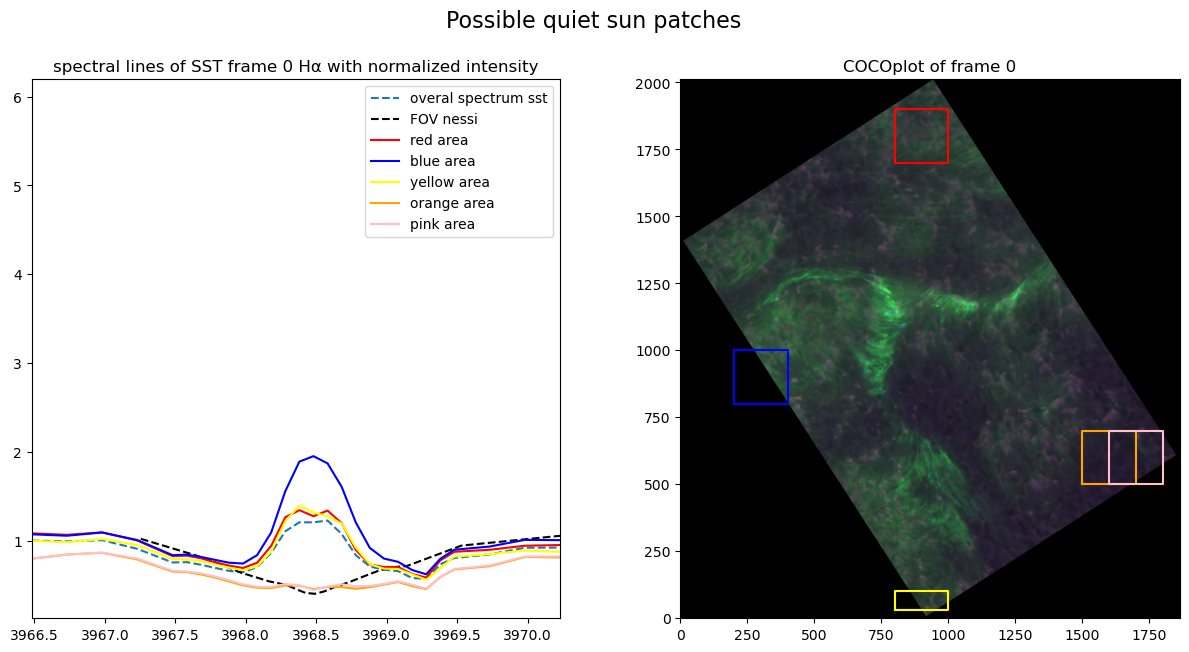

In [22]:
frame=0

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaK.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(1700,1900)], [(200,400), (800, 1000)], [(800, 1000), (30, 100)], [(1500,1700),(500, 700)], [(1600,1800),(500, 700)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect, '--', label='overal spectrum sst')
theta = [0,0,1]

ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.spectr_fov + theta[1], '--', color= 'black', label='FOV nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
ax[0].set_xlim((np.min(CaK._wavel), np.max(CaK._wavel[:-1])))



ax[1].imshow(CaK.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaK._wavel, CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [23]:
color_wanted_patch = 'pink'

the edges of the patch are denoted by the xlim: (1600, 1800) and ylim: (500, 700)


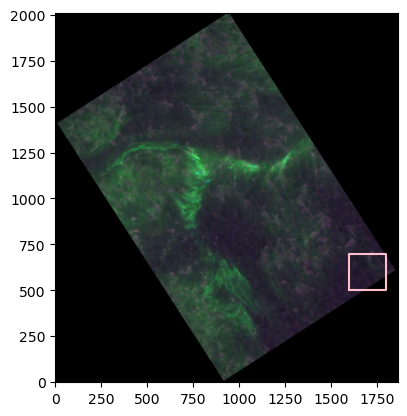

{'frame': 0, 'xlim': (1600, 1800), 'ylim': (500, 700), 'color': 'pink'}

In [24]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaK.quiet_sun

The quiet sun is pick at x (-378.26289341251834, -405.2328528610006) with average              mu 0.8162749559131068


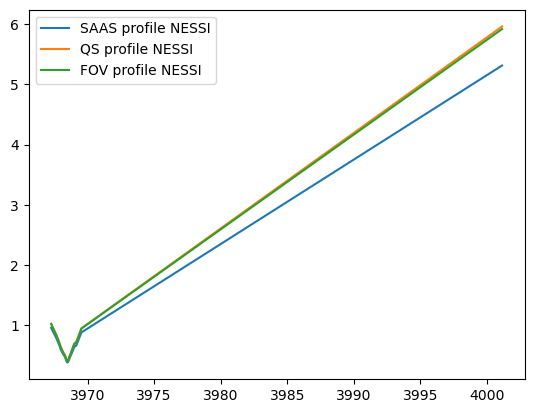

In [25]:
theor_CaK.set_quiet_sun(xlim=xlim, ylim=ylim)


the theta fit is  [0, 0, 0.838403723293344]


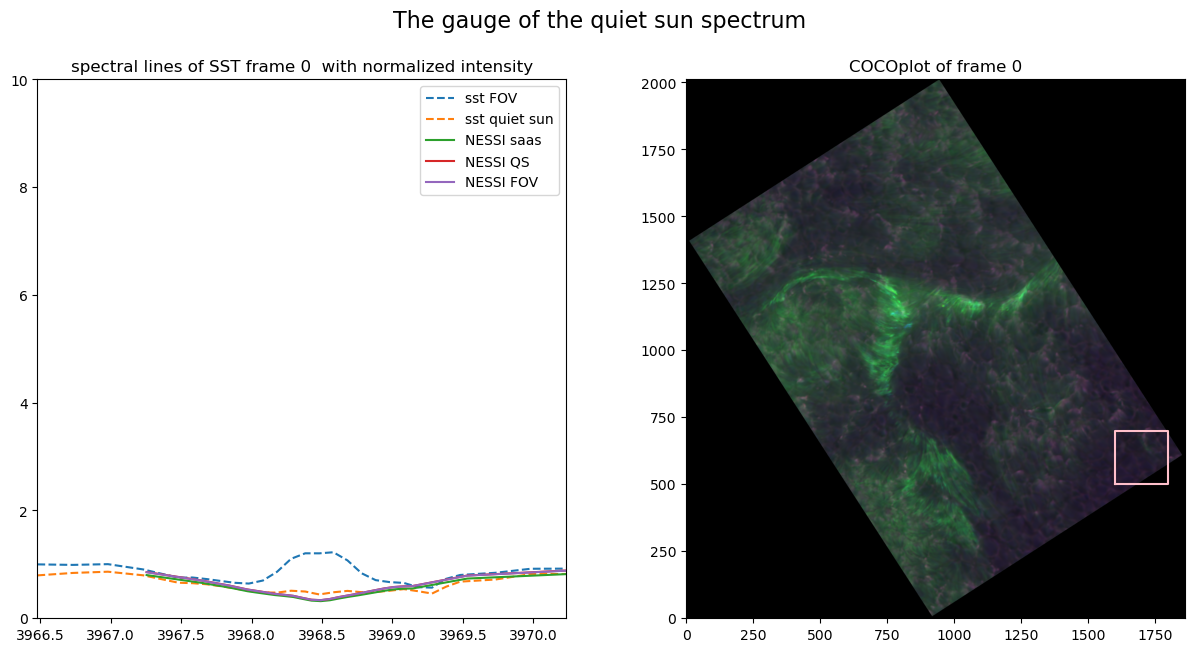

In [26]:
reload(un)
un.fit_qs_to_NESSI_cont_point(theor_CaK, CaK,  frame=0, xshift=0)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [27]:
sst_data = CaK
CaK.shape

(34, '??', 29, 2012, 1864)

In [28]:
CaK.calculate__FOV_spect_over_time()

In [29]:
sst_data.quiet_sun

{'frame': 0, 'xlim': (1600, 1800), 'ylim': (500, 700), 'color': 'pink'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [0] at time ['t=09:37:12 UT'].
The SST data runs from t=09:37:12 UT to t=09:50:57 UT.
The areafactor for THIS flare is 0.000919762321320109 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 73.91%.


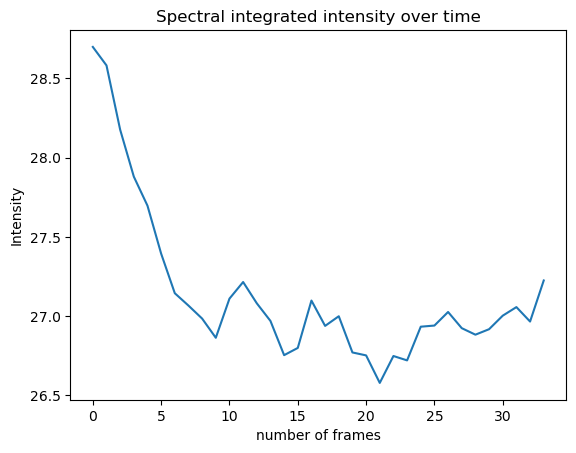

In [30]:
reload(un)
un.save_for_further_analysis(CaK, theor_CaK)


# Movie Making

[0, 0, 0.838403723293344]
Frame: 0, 09:37:12.42340, total number of frames: 34 


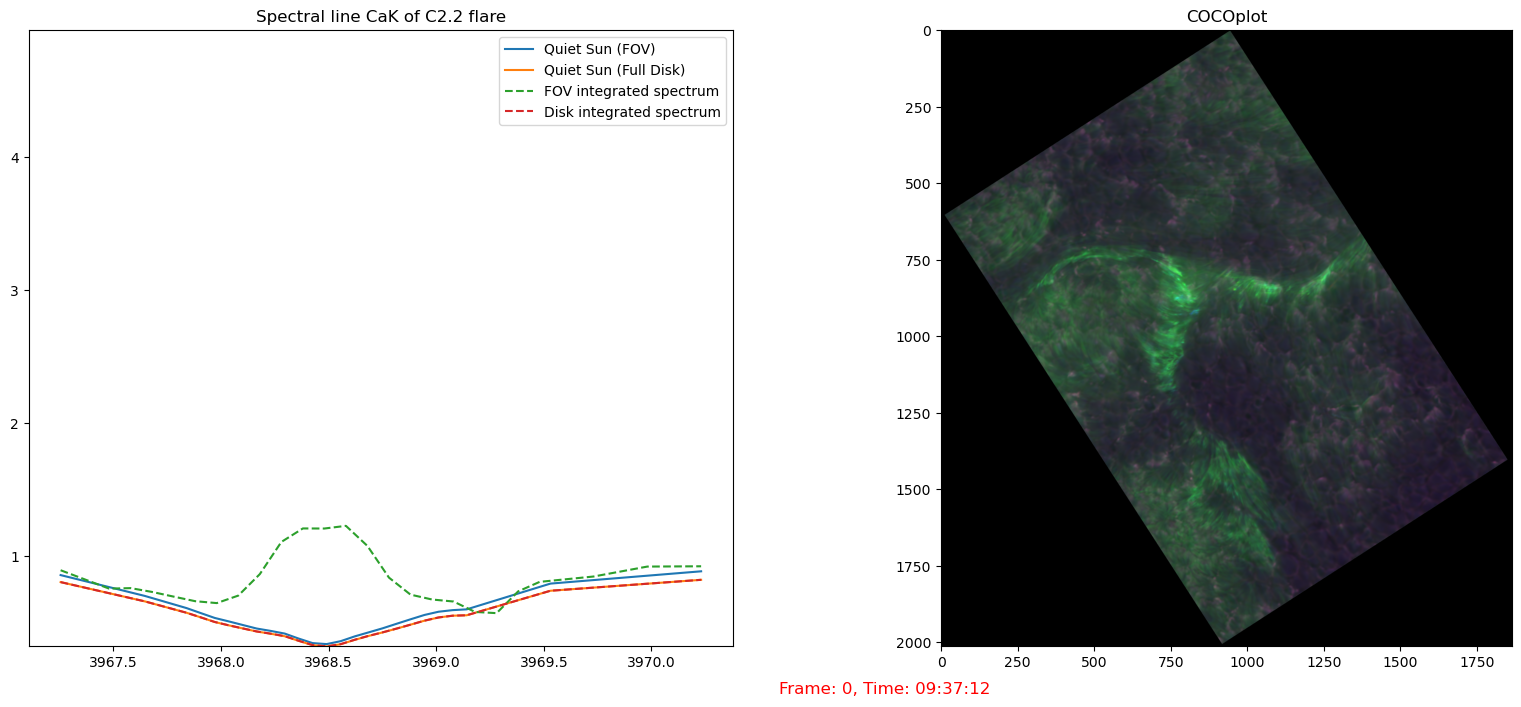

In [31]:
# fill in here all arguments
theor_line = theor_CaK
sst_data = CaK
name_of_flare = "C2.2"
name_of_line = "CaK"
step=True
show_boundary=False

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step, show_boundary)